# Early Fusion Model - CMU-MOSEI Dataset

In this notebook, we implement the Early Fusion Model, and test it on CMU-MOSEI dataset.

## Importing Libraries

In [1]:
import os
import sys
import torch

import numpy as np
import matplotlib.pyplot as plt

sys.path.append(os.getcwd())
sys.path.append(os.path.dirname(os.path.dirname(os.getcwd())))

## Importing Helper Functions

In [2]:
from helpers.data.get_data import get_dataloader
from helpers.unimodals.common_models import GRU, MLP, Sequential, Identity
from helpers.training.supervised_learning import train, test
from helpers.fusions.common_fusions import ConcatEarly
from helpers.utils.common_utils import get_default_device, save_results

## Loading the Dataset

In [3]:
traindata, validdata, testdata = get_dataloader(
    '/scratch/rrm9598/data/mosei_raw.pkl', robust_test=False, max_pad=True, data_type='mosei', max_seq_len=50)

In [4]:
device = get_default_device()
print(device)

cuda


## Model Architecture

In [5]:
encoders = [Identity().to(device), Identity().to(device), Identity().to(device)]
head = Sequential(GRU(1087, 1024, dropout=True, has_padding=False,
                  batch_first=True, last_only=True), MLP(1024, 512, 1)).to(device)

In [6]:
fusion = ConcatEarly().to(device)

## Training

In [7]:
FILE_NAME = 'mosei_ef_r0'

In [8]:
train_losses, valid_losses = train(encoders, fusion, head, traindata, validdata, 100, task="regression", optimtype=torch.optim.AdamW,
      is_packed=False, lr=1e-3, save=f'/scratch/rrm9598/Multimodal-Sentiment-Analysis/models/{FILE_NAME}.pt', weight_decay=0.01, objective=torch.nn.L1Loss())

Epoch [1/100]
Train Loss: 0.8474
Valid Loss: 0.7766
Saving Best

Epoch [2/100]
Train Loss: 0.8462
Valid Loss: 0.7758
Saving Best

Epoch [3/100]
Train Loss: 0.8451
Valid Loss: 0.7746
Saving Best

Epoch [4/100]
Train Loss: 0.8405
Valid Loss: 0.7671
Saving Best

Epoch [5/100]
Train Loss: 0.8367
Valid Loss: 0.7659
Saving Best

Epoch [6/100]
Train Loss: 0.8428
Valid Loss: 0.7761

Epoch [7/100]
Train Loss: 0.8453
Valid Loss: 0.7765

Epoch [8/100]
Train Loss: 0.8406
Valid Loss: 0.7729

Epoch [9/100]
Train Loss: 0.8403
Valid Loss: 0.7850

Epoch [10/100]
Train Loss: 0.8404
Valid Loss: 0.7685

Epoch [11/100]
Train Loss: 0.8436
Valid Loss: 0.7752

Epoch [12/100]
Train Loss: 0.8438
Valid Loss: 0.7743

Epoch [13/100]
Train Loss: 0.8423
Valid Loss: 0.7781

Epoch [14/100]
Train Loss: 0.8416
Valid Loss: 0.7750

Epoch [15/100]
Train Loss: 0.8419
Valid Loss: 0.7740

Epoch [16/100]
Train Loss: 0.8407
Valid Loss: 0.7633
Saving Best

Epoch [17/100]
Train Loss: 0.8407
Valid Loss: 0.7688

Epoch [18/100]
Trai

Text(0.5, 1.0, 'Loss vs. No. of epochs')

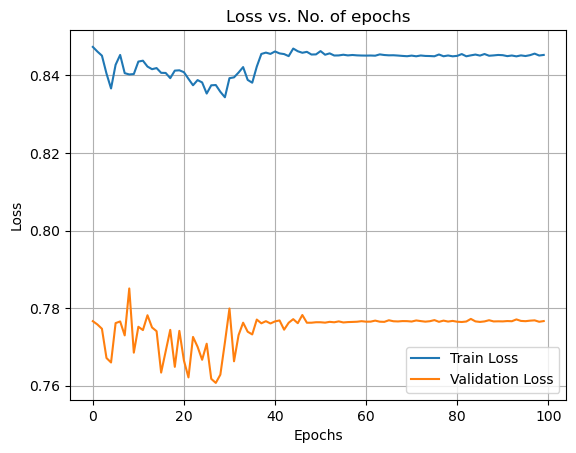

In [9]:
plt.plot(train_losses, label='Train Loss')
plt.plot(valid_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.title('Loss vs. No. of epochs')

In [10]:
save_results(train_losses, valid_losses, f'/scratch/rrm9598/Multimodal-Sentiment-Analysis/results/{FILE_NAME}.pkl')

## Testing

In [11]:
model = torch.load(f'/scratch/rrm9598/Multimodal-Sentiment-Analysis/models/{FILE_NAME}.pt').to(device)

test(model, testdata, 'affect', is_packed=False,
     criterion=torch.nn.L1Loss(), task="posneg-classification", no_robust=True)

Recall: 62.8540% | Total Accuracy: 49.0347%
Inference Time: 1s430ms
Inference Params: 7016449
